# **Online Retail**

This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

dataset refrence link :[Online Retail Dataset (UCI)](https://archive.ics.uci.edu/dataset/352/online+retail)

# **steps to analyze this dataset:**
1) Understand the Dataset
2) Clean the Data
3) Exploratory Analysis (EDA)
4)  Key Visualizations
5)  Insights & Recommendations
6)   Deliverables 

# 1) Understanding the dataset


In [1]:
# import nessecary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


%matplotlib inline

In [2]:
df = pd.read_excel('Online_Retail.xlsx')

In [5]:
df.shape

(541909, 8)

In [7]:
df.size

4335272

In [9]:
len(df)

541909

In [11]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [13]:
df.describe()


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [15]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [17]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [19]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# 2) Cleaning the dataset

In [24]:
df.isnull().sum()
# check for missing values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [26]:
# cehck the  percentage of null values in the Description column 
null_description=df["Description"].isnull().mean()* 100
print(f"{null_description:.2f}% of rows have 'NULL' as the Description.")
# since its a littile percentage its safe to drop the Null values in this column

0.27% of rows have 'NULL' as the Description.


In [28]:
# drop the Null values in the description Colmun 
df = df.dropna(subset=["Description"])
# make sure that the columns are dropped 
df.isnull().sum()


InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

In [30]:
# do the same for the CoustmerID column:
null_Costumer= df["CustomerID"].isnull().mean()* 100
print(f"{null_Costumer:.2f}% of rows have 'NULL' as the ID.")



24.72% of rows have 'NULL' as the ID.


In [32]:
# cant drop the Null coustmerID as it is 24% which is a moderate percentage i will lable this percentage as guest 
df["CustomerID"] = df["CustomerID"].fillna("Guest")


In [34]:
# make sure that the columns are renamed
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [36]:
# from EDA i found out that i have a country named Unspecified , lets check its percentage
unspecified_pct = (df["Country"] == "Unspecified").mean() * 100
print(f"{unspecified_pct:.2f}% of rows have 'Unspecified' as the country.")


0.08% of rows have 'Unspecified' as the country.


In [38]:
#small percentage we can drop them :
df = df[df["Country"] != "Unspecified"]


In [40]:
# make sure that they are dropped.
unspecified_pct = (df["Country"] == "Unspecified").mean() * 100
print(f"{unspecified_pct:.2f}% of rows have 'Unspecified' as the country.")

0.00% of rows have 'Unspecified' as the country.


In [42]:
# from EDA i realized that not everything in the description is an actual item some are just fees so i should clean them out 
descriptions = df["Description"].dropna().unique()
print(f"Total unique descriptions: {len(descriptions)}")
print(descriptions[:50])  # show first 50 for a peek


Total unique descriptions: 4223
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' 'KNITTED UNION FLAG HOT WATER BOTTLE'
 'RED WOOLLY HOTTIE WHITE HEART.' 'SET 7 BABUSHKA NESTING BOXES'
 'GLASS STAR FROSTED T-LIGHT HOLDER' 'HAND WARMER UNION JACK'
 'HAND WARMER RED POLKA DOT' 'ASSORTED COLOUR BIRD ORNAMENT'
 "POPPY'S PLAYHOUSE BEDROOM " "POPPY'S PLAYHOUSE KITCHEN"
 'FELTCRAFT PRINCESS CHARLOTTE DOLL' 'IVORY KNITTED MUG COSY '
 'BOX OF 6 ASSORTED COLOUR TEASPOONS' 'BOX OF VINTAGE JIGSAW BLOCKS '
 'BOX OF VINTAGE ALPHABET BLOCKS' 'HOME BUILDING BLOCK WORD'
 'LOVE BUILDING BLOCK WORD' 'RECIPE BOX WITH METAL HEART'
 'DOORMAT NEW ENGLAND' 'JAM MAKING SET WITH JARS'
 'RED COAT RACK PARIS FASHION' 'YELLOW COAT RACK PARIS FASHION'
 'BLUE COAT RACK PARIS FASHION' 'BATH BUILDING BLOCK WORD'
 'ALARM CLOCK BAKELIKE PINK' 'ALARM CLOCK BAKELIKE RED '
 'ALARM CLOCK BAKELIKE GREEN' 'PANDA AND BUNNIES STICKER SHEET'
 'STARS GIFT TAPE ' 'INFLATABLE POLITICAL GL

In [44]:
non_product_keywords = [
    "Manual", "AMAZON FEE", "FEE", "Adjust bad debt", 
    "POSTAGE", "DOTCOM POSTAGE", "CRUK Commission", 
    "Discount", "SAMPLES" , "Bank Charges"
]

pattern = '|'.join([kw.lower() for kw in non_product_keywords])

# Safe filtering
df["Description_clean"] = df["Description"].fillna("").str.lower()
mask = ~df["Description_clean"].str.contains(pattern, na=False, regex=True)

df_products_only = df[mask]


# 3) EDA

In [47]:
# lets check how many countries we have and what are they?
print(f"Number of countries: {df['Country'].nunique()}")
print("Countries:")
print(df['Country'].unique())



Number of countries: 37
Countries:
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Brazil' 'USA' 'European Community' 'Malta'
 'RSA']


In [49]:
# lets first check which country has the most guest count
guest_countries = df[df["CustomerID"] == "Guest"]["Country"].value_counts()
print(guest_countries)


Country
United Kingdom    132146
EIRE                 711
Hong Kong            288
Switzerland          125
France                66
Israel                47
Portugal              39
Bahrain                2
Name: count, dtype: int64


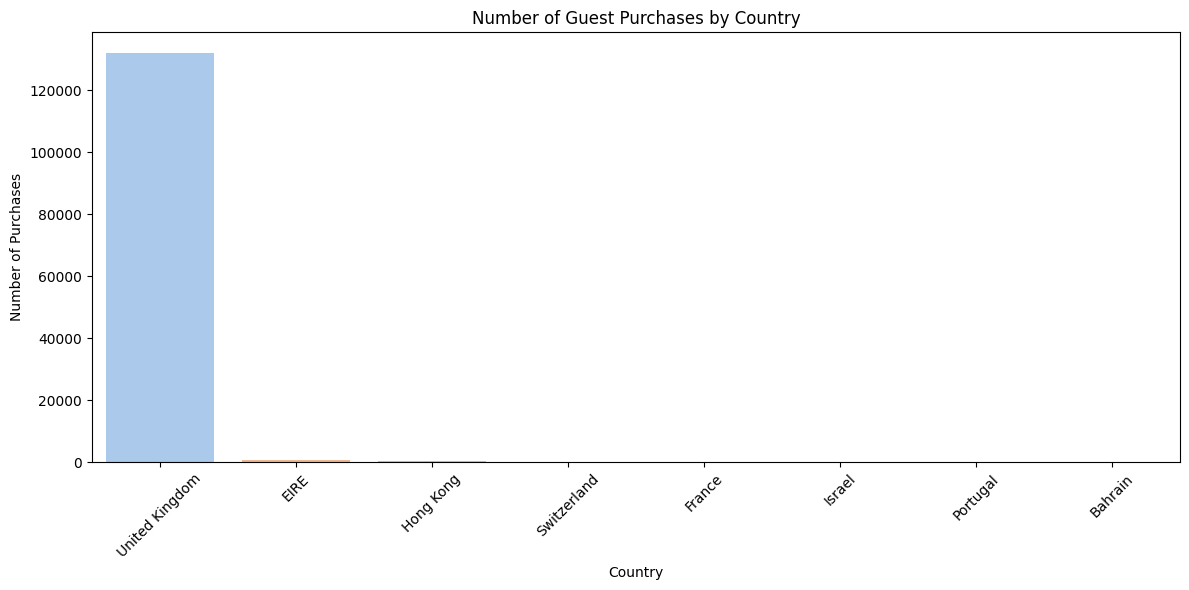

In [97]:
plt.figure(figsize=(12, 6))
sb.barplot(
    data=guest_countries_df,
    x="Country",
    y="GuestPurchases",
    hue="Country",           # Assign hue to match x
    palette="pastel",
    dodge=False,             # Prevent grouped bars
    legend=False             # Hide the duplicated legend
)
plt.title("Number of Guest Purchases by Country")
plt.xlabel("Country")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [51]:
# lets first check which country has the most purchases:
country_counts = df["Country"].value_counts()
print(country_counts)


Country
United Kingdom          494024
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


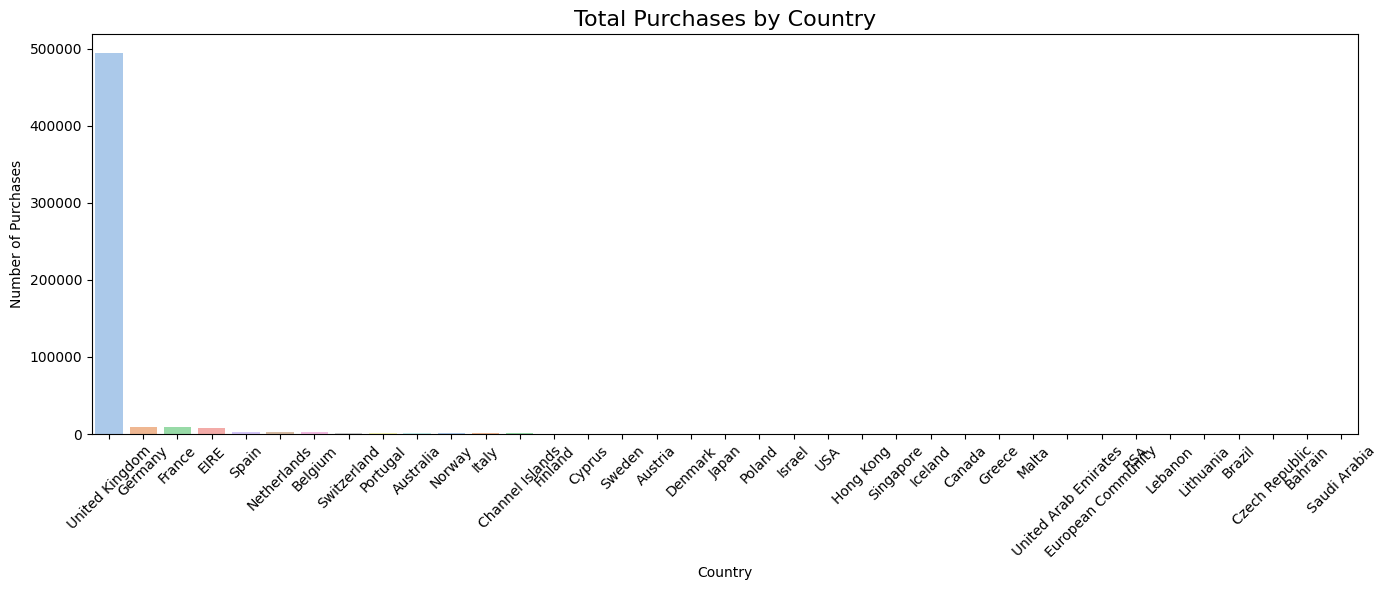

In [95]:
plt.figure(figsize=(14, 6))
sb.barplot(
    data=country_counts_df,
    x="Country",
    y="TotalPurchases",
    hue="Country",
    palette="pastel",  
    dodge=False,
    legend=False
)
plt.title("Total Purchases by Country", fontsize=16)
plt.xlabel("Country")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [53]:
# the most purchased item?
Description_counts = df["Description"].value_counts()
print(Description_counts)

Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2198
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1636
                                      ... 
WHITE FRANGIPANI HAIR CLIP               1
BEADED LOVE HEART JEWELLERY SET          1
OCEAN STRIPE HAMMOCK                     1
INCENSE BAZAAR PEACH                     1
BLUE CRYSTAL BOOT PHONE CHARM            1
Name: count, Length: 4223, dtype: int64


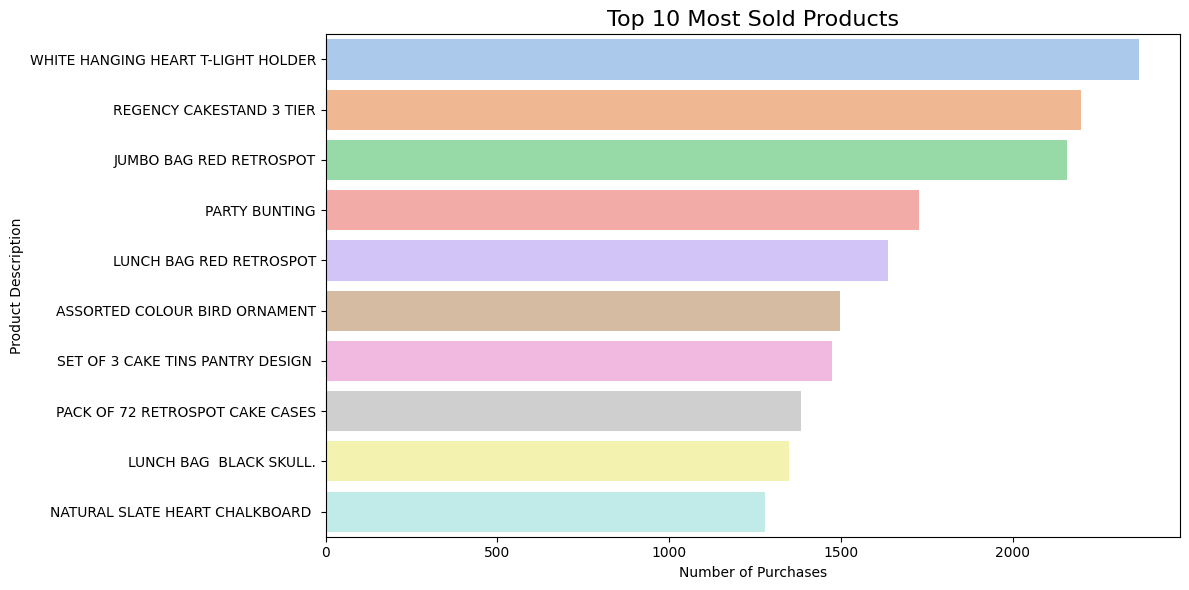

In [91]:
top_descriptions = df["Description"].value_counts().head(10).reset_index()
top_descriptions.columns = ["Description", "Count"]


plt.figure(figsize=(12, 6))
sb.barplot(
    data=top_descriptions,
    x="Count",
    y="Description",
    palette="pastel",
    hue="Description",   
    legend=False          
)
plt.title("Top 10 Most Sold Products", fontsize=16)
plt.xlabel("Number of Purchases")
plt.ylabel("Product Description")
plt.tight_layout()
plt.show()



In [55]:
# the most expensive items?
df_products_only[["Description", "UnitPrice"]]\
    .sort_values(by="UnitPrice", ascending=False)\
    .drop_duplicates("Description")\
    .head(10)



,Description,UnitPrice
222680,PICNIC BASKET WICKER 60 PIECES,649.50
32484,VINTAGE RED KITCHEN CABINET,295.00
118769,VINTAGE BLUE KITCHEN CABINET,295.00
166111,LOVE SEAT ANTIQUE WHITE METAL,195.00
350180,RUSTIC SEVENTEEN DRAWER SIDEBOARD,165.00
201992,REGENCY MIRROR WITH SHUTTERS,165.00
39777,CARRIAGE,150.00
100581,CHEST NATURAL WOOD 20 DRAWERS,125.00
72653,HALL CABINET WITH 3 DRAWERS,100.00
256883,CINDERELLA CHANDELIER,99.96


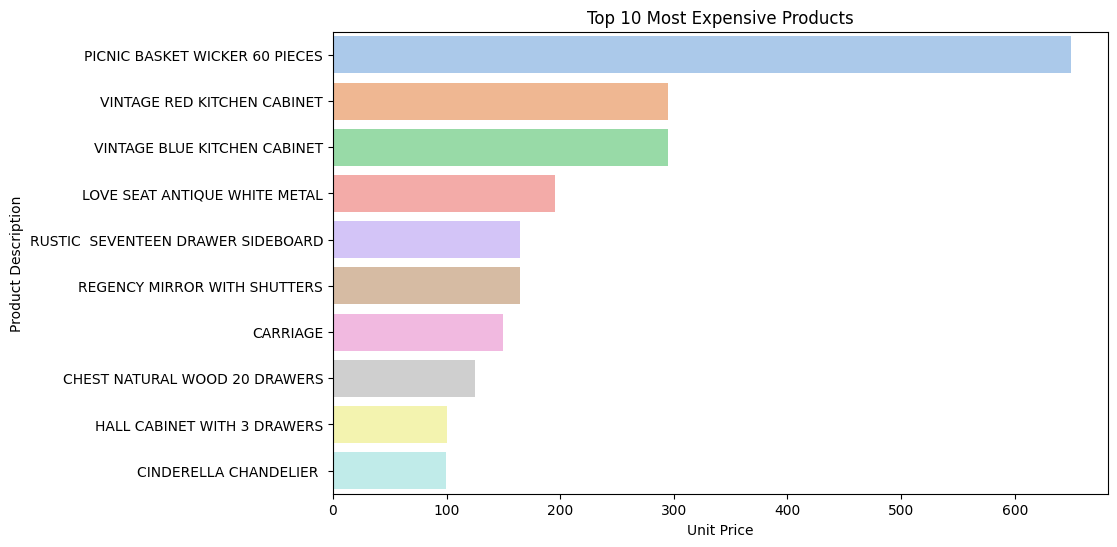

In [99]:
top_expensive = df_products_only[["Description", "UnitPrice"]] \
    .sort_values(by="UnitPrice", ascending=False) \
    .drop_duplicates("Description") \
    .head(10)

plt.figure(figsize=(10, 6))
sb.barplot(
    data=top_expensive,
    x="UnitPrice",
    y="Description",
    palette="pastel",
    hue="Description",   # Assign hue same as y to fix warning
    legend=False         # Hide the extra legend
)
plt.title("Top 10 Most Expensive Products")
plt.xlabel("Unit Price")
plt.ylabel("Product Description")
plt.show()


In [59]:
#at what time do the costumer buys their stuff like the most frequent time amongst all countries ?
df["Hour"] = df["InvoiceDate"].dt.hour
hourly_counts = df["Hour"].value_counts().sort_index()
print(hourly_counts)


Hour
6        41
7       383
8      8906
9     34242
10    48876
11    57518
12    78478
13    72093
14    67226
15    77214
16    54155
17    28342
18     7959
19     3705
20      871
Name: count, dtype: int64


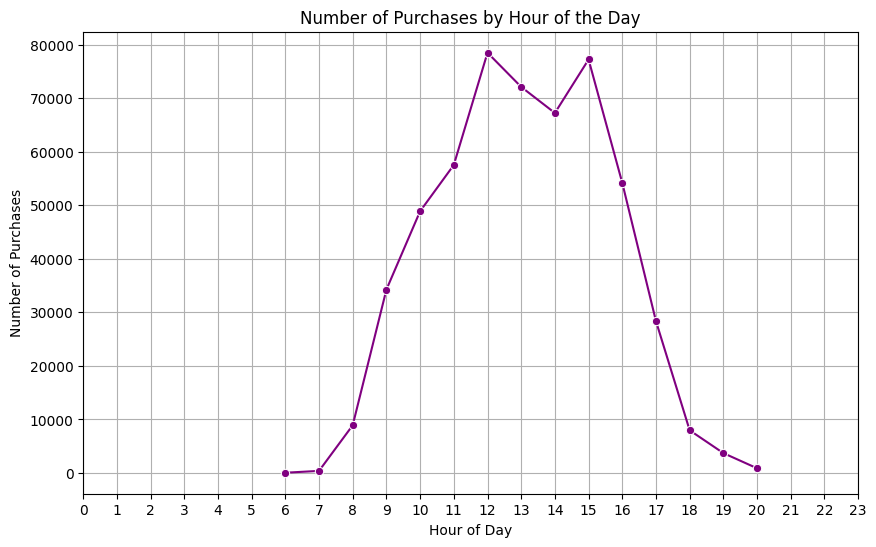

In [107]:
plt.figure(figsize=(10,6))
sb.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker="o", color="purple")
plt.title("Number of Purchases by Hour of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Purchases")
plt.xticks(range(0,24))
plt.grid(True)
plt.show()


In [63]:
# what about in each country like the most time that coustumer buy at each country ?
hourly_country = df.groupby(["Country", "Hour"]).size().reset_index(name="PurchaseCount")
most_active_hour_per_country = hourly_country.sort_values("PurchaseCount", ascending=False).groupby("Country").first()
print(most_active_hour_per_country)

                      Hour  PurchaseCount
Country                                  
Australia               12            262
Austria                 10            107
Bahrain                 13             13
Belgium                 14            351
Brazil                  10             32
Canada                  10             78
Channel Islands         10            183
Cyprus                  12            399
Czech Republic           8             15
Denmark                 10            105
EIRE                    10           1459
European Community      10             40
Finland                  9            200
France                  10           1307
Germany                 13           1466
Greece                   9             36
Hong Kong               14            150
Iceland                 14             60
Israel                   8            171
Italy                   13            200
Japan                   11            121
Lebanon                 10        

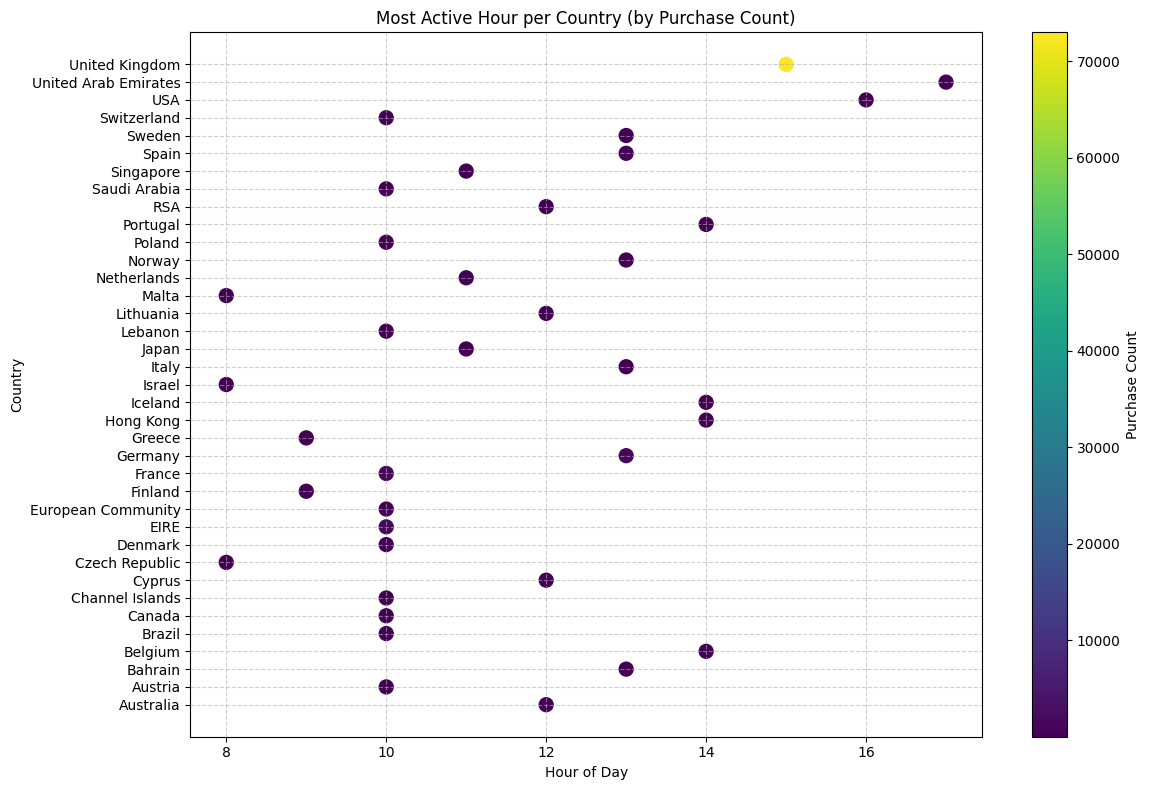

In [125]:
plt.figure(figsize=(12, 8))
plt.scatter(
    x=most_active_hour_per_country["Hour"],
    y=most_active_hour_per_country.index,
    c=most_active_hour_per_country["PurchaseCount"],
    cmap="viridis",
    s=100
)
plt.colorbar(label="Purchase Count")
plt.xlabel("Hour of Day")
plt.ylabel("Country")
plt.title("Most Active Hour per Country (by Purchase Count)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


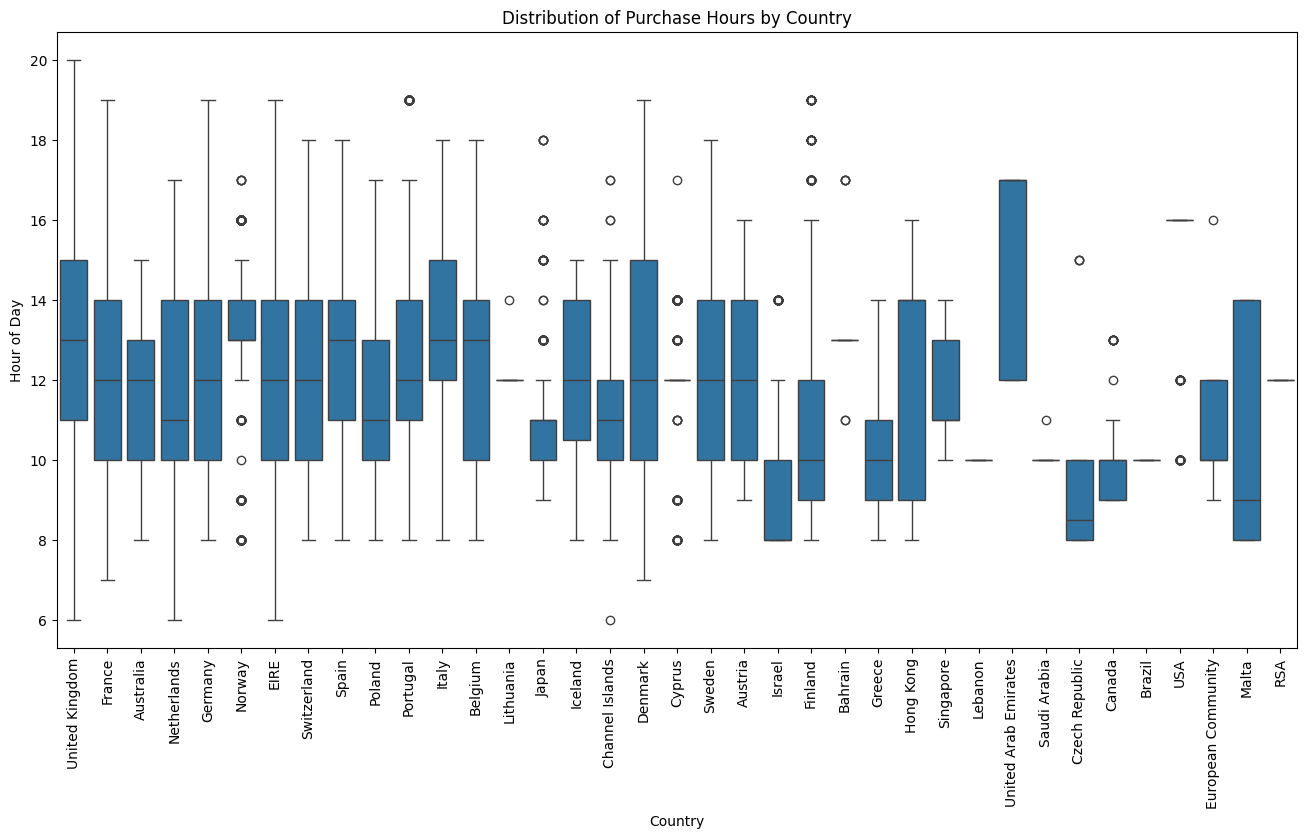

In [115]:
plt.figure(figsize=(16,8))
sb.boxplot(data=df, x="Country", y="Hour")
plt.title("Distribution of Purchase Hours by Country")
plt.xticks(rotation=90)
plt.ylabel("Hour of Day")
plt.show()


In [69]:
#what about the most active day in each country ?

df["DayName"] = df["InvoiceDate"].dt.day_name()

daily_country = df.groupby(["Country", "DayName"]).size().reset_index(name="purchaseCount")

most_active_day_per_country = ( daily_country.sort_values("purchaseCount", ascending=False) .groupby("Country") .first() .reset_index())


print(most_active_day_per_country)


                 Country    DayName  purchaseCount
0              Australia   Thursday            394
1                Austria     Monday            136
2                Bahrain     Monday             14
3                Belgium   Thursday            519
4                 Brazil     Friday             32
5                 Canada     Monday            144
6        Channel Islands  Wednesday            215
7                 Cyprus     Friday            180
8         Czech Republic     Monday             15
9                Denmark   Thursday            185
10                  EIRE     Monday           1670
11    European Community   Thursday             29
12               Finland    Tuesday            247
13                France  Wednesday           1879
14               Germany   Thursday           2293
15                Greece     Monday             57
16             Hong Kong    Tuesday            111
17               Iceland    Tuesday             53
18                Israel   Thur

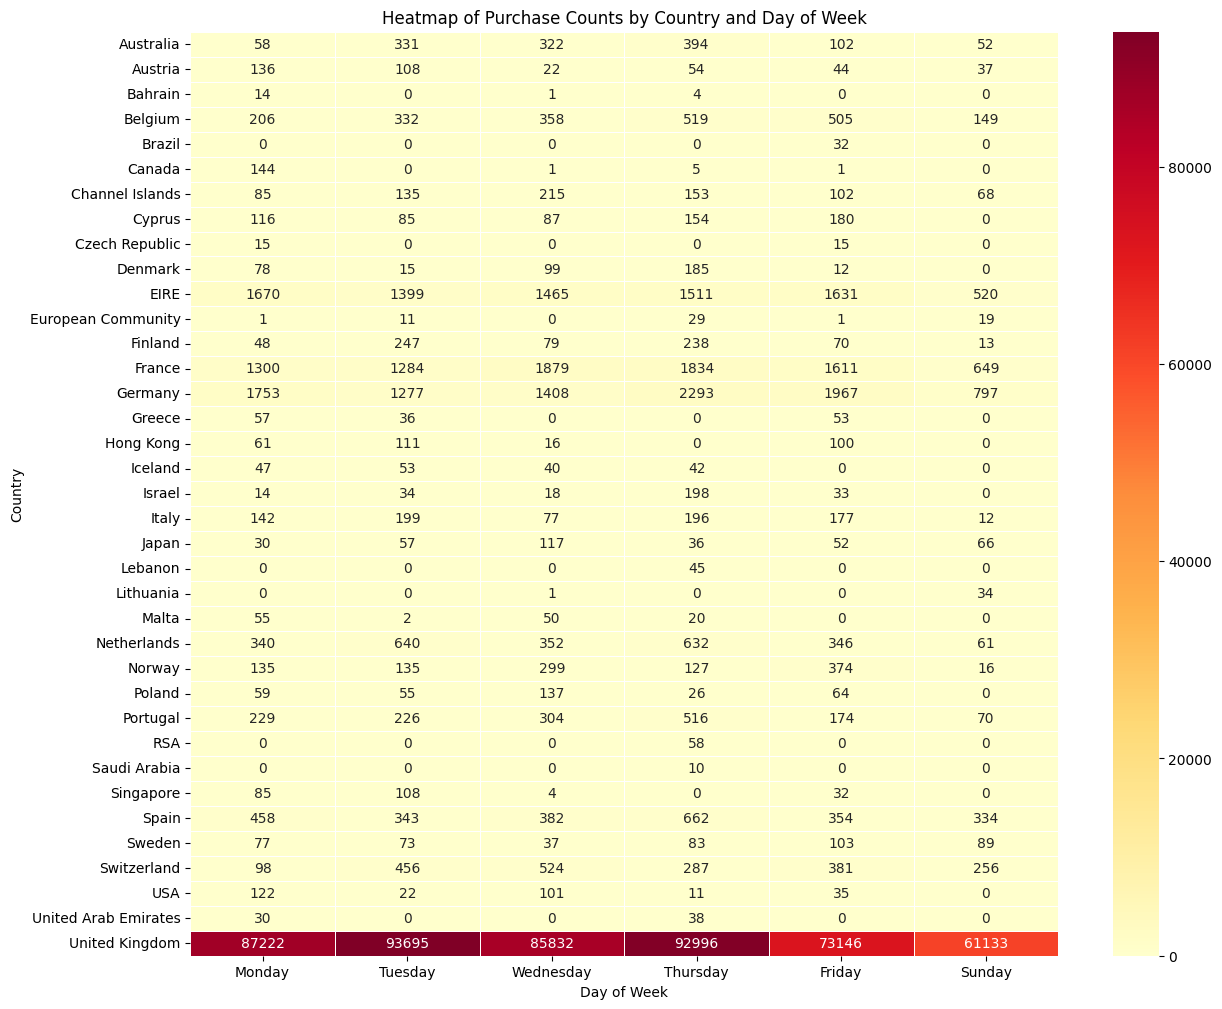

In [123]:

heatmap_data = daily_country.pivot(index='Country', columns='DayName', values='purchaseCount').fillna(0)


day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
existing_days = [day for day in day_order if day in heatmap_data.columns]
heatmap_data = heatmap_data[existing_days]


plt.figure(figsize=(14, 12))
sb.heatmap(heatmap_data, cmap="YlOrRd", linewidths=.5, annot=True, fmt=".0f")
plt.title("Heatmap of Purchase Counts by Country and Day of Week")
plt.ylabel("Country")
plt.xlabel("Day of Week")
plt.show()